# Project: Medical Appointment No Shows data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


In this project I chose the Medical Appointment No Shows data set to investigate. 
The data set contains 110,527 medical appointment records with 14 associated variables.
In this notebook 4 research question will be tackled as follows:<br>
 - Is the time between scheduling the appointment and the appointment relate to the probability of the patient not showing?
 - Does the neighbourhoood relate to the probability of the patient not showing?
 - Is having a scholarship or not relate to the probability of a patient not showing?
 - Does a certain gender have a higher probability of missing appointments?

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
df = pd.read_csv('KaggleV2-May-2016.csv')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In this section the general properties of the data is explored. Finding any errors or problems with data to be cleaned in the next section.

In [2]:
# Determining the dimensions of the data
df.shape

(110527, 14)

As previously mentioned the data consists of 110527 row and 14 columns

In [3]:
# Quick look of how the entries look like
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This is how the data looks like. At the first look the dates need to be parsed, appointment id should be dropped and some data types may be changed.

In [4]:
# Some statistical information about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


in the numerical info of the data a problem can be seen, the minimum age is -1 which is of course an error. This will be cleaned in the next section.

In [5]:
# Knowing the data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


It can be seen that all columns have no null values, which is great.

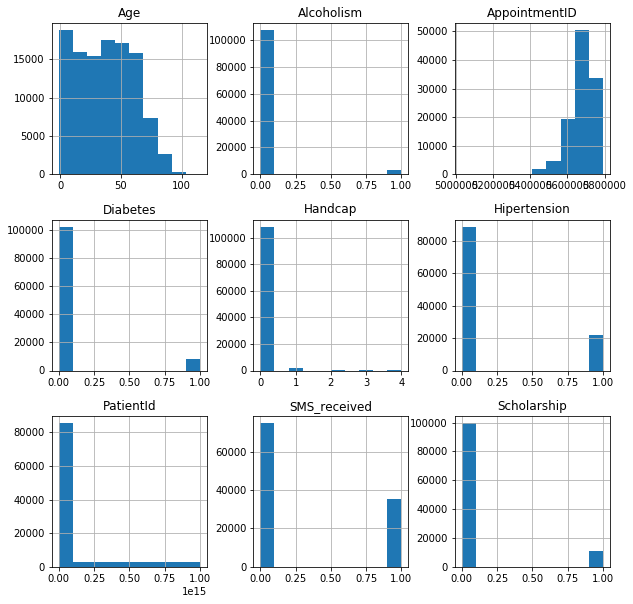

In [6]:
# Quick visualisation of the data
df.hist(figsize = (10,10));

Some quick visualisation of how the data is distrubted.

### Renaming columns, fixing age minimum value, parsing dates and creating new column

In [7]:
# Removing all upper case letters from column names and replacing any "-" with "_" for easier use of column names
df.rename(columns = lambda x:x.strip().lower().replace("-", "_"), inplace=True)

Now all the column names consist only of lower-case letters and underscores.

In [8]:
# Getting the number of corrupted entries with age below 0
sum(df['age'] < 0)

1

There is only one entry with age below zero, this further proves it is just an error. So this single enry can be dropped.

In [9]:
# Dropping The entry with age below 0 from the data frame
df.drop(df.index[df['age'] < 0], inplace = True)

Now all the entries have a minimum age of 0 (assuming these are new born babies and not an error).

In [10]:
# Dropping the appointment id column as it won't be used through the data set investigation
df.drop(['appointmentid'], axis = 1, inplace = True)

The appointment id does not contain any data that could be useful in the investigation so it was dropped.

In [11]:
# Replacing the values in the no show column from Yes/No to 1/0
df.replace({'no_show': {'Yes': 1, 'No': 0}}, inplace = True)

No the no_show column consists of zeros and ones to facilitate the upcoming numerical analysis.

In [12]:
# Parsing the scheduled day column values from string to dates
df['scheduledday']= pd.to_datetime(df['scheduledday']).dt.date

In [13]:
# Parsing the appointment day column values from string to dates
df['appointmentday']= pd.to_datetime(df['appointmentday']).dt.date

now the scheduledday and appointmentday are dates not strings.

In [14]:
# Creating a new column called time_to_app representing the number of days from
# scheduling the appointment till the appointment itself
df['time_to_app'] = (df['appointmentday'] - df['scheduledday']).dt.days

A new column "time_to_app" is created to represent the number of days from scheduling the appointment till the appointment itself.

In [15]:
# Checking how the new column looks like
df.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_to_app
0,2.987250e+13,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


This is how the data frame currently looks like.

In [16]:
# Checking the numerical data of the new column
df.describe()

,patientid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,time_to_app
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.201934,10.183794
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445,15.255034
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


The numerical info now shows a problem with the new column. The minimum value of time_to_app is -6 which is impossible.

In [17]:
# Getting the number of entries were the appointment was scheduleded after being already done
sum(df.time_to_app < 0)

5

After checking the number of entries with time_to_app below 0, turned out to be only 5 entries so they also can be dropped.

In [18]:
# Removing corrupted entries were time_to_app is a negative value
df.drop(df.index[df['time_to_app'] < 0], inplace = True)

Now the data is cleaned after dropping the last 5 errorsome entries.

<a id='eda'></a>
## Exploratory Data Analysis


### Is the time between scheduling the appointment and the appointment relate to the probability of the patient not showing?

In [19]:
# Creating a new data frame with only time_to_app and no_show columns
df_1 = df[['time_to_app','no_show']].copy()

# Creating a new data frame representing the number of entries with a certain time_to_app value
df_2 = df_1.groupby(['time_to_app']).count()

# Creating a new data frame representing the number of entries that didn't show with a certain time_to_app value
df_3 = df_1.groupby(['time_to_app']).sum()

#Calculating the percentage of no show in each value of time_to_app by the formula
# (no. of entries that didn't show / total no. of entries) * 100
df_3['perecentage'] = (df_3['no_show'] / df_2['no_show'])*100

In the previous cell a new data frame is created containing the percengtage of not showing against each value for the number of days between scheduling the appointment till the appointment itself.

In [20]:
# Dropping the no_show columns as we don't need it anymore
df_3.drop(['no_show'], axis = 1, inplace = True)

Removing the no_show column as it won't be needed to plot the fidings.

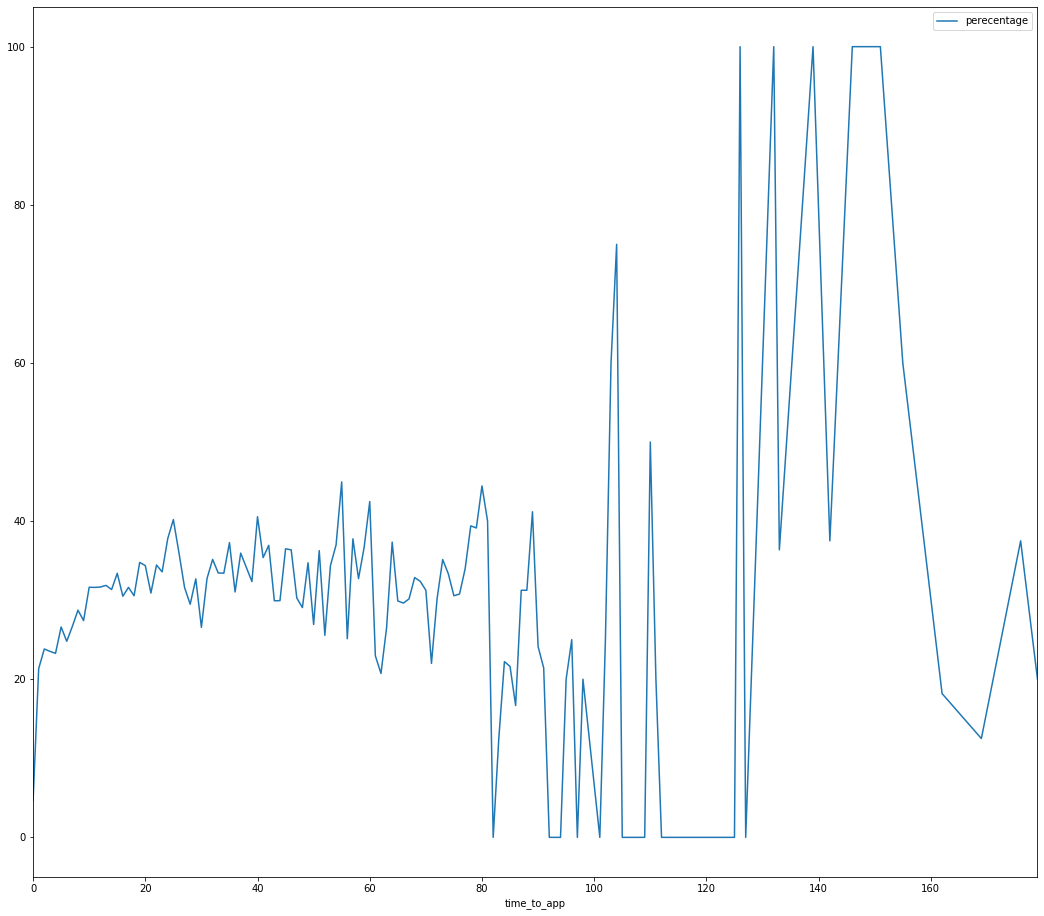

In [21]:
# Plotting the perecentage of not showing against number of days from scheduling till the appointment
df_3.plot(figsize=(18,16));

The plot initially shows an overall increase between the probability of not showing and the number of days between scheduling the appointment and the appointment. <br>
untill the time_to_app reaches 80 the plot starts to fluctuate sharply, this may be due to the sparcity of entries with time_to_app greater than 80.

In [22]:
#show = df.no_show == False
#no_show = df.no_show == True

In [23]:
#min = df__.no_show.min()
#max = df__.no_show.max()

In [24]:
#def normalize(x, x_min, x_max):
#    r = x_max - x_min
#    result = (x - x_min) *100 / r
    
#    return result

In [25]:
#df__.apply(normalize, args=(min, max)).plot()

The previous 4 cells are an inital idea that didn't work and left only for reference

### Does the neighbourhoood relate to the probability of the patient not showing?

In [26]:
# Creating a new data frame with only neighbourhood and no_show columns
df_1 = df[['neighbourhood','no_show']].copy()

# Creating a new data frame representing the number of entries in each neighbourhood
df_2 = df_1.groupby(['neighbourhood'],as_index=False).count()

# Creating a new data frame representing the number of entries in each neighbourhood that didn't show
df_3 = df_1.groupby(['neighbourhood'],as_index=False).sum()

#Calculating the percentage of no show in each neighbourhood by the formula
# (no. of entries in neighbourhood that didn't show / total no. of entries in neighbourhood) * 100
df_3['perecentage'] = (df_3['no_show'] / df_2['no_show'])*100

# Dropping the no_show columns as we don't need it anymore
df_3.drop(['no_show'], axis = 1, inplace = True)

In the previous cell a new data frame is created containing the percengtage of not showing against each neighbourhood.

In [27]:
# Determining the no. of neighbourhoods to adjust the following plot
df_3.shape

(81, 2)

There is 81 different neighbourhoods in the data.

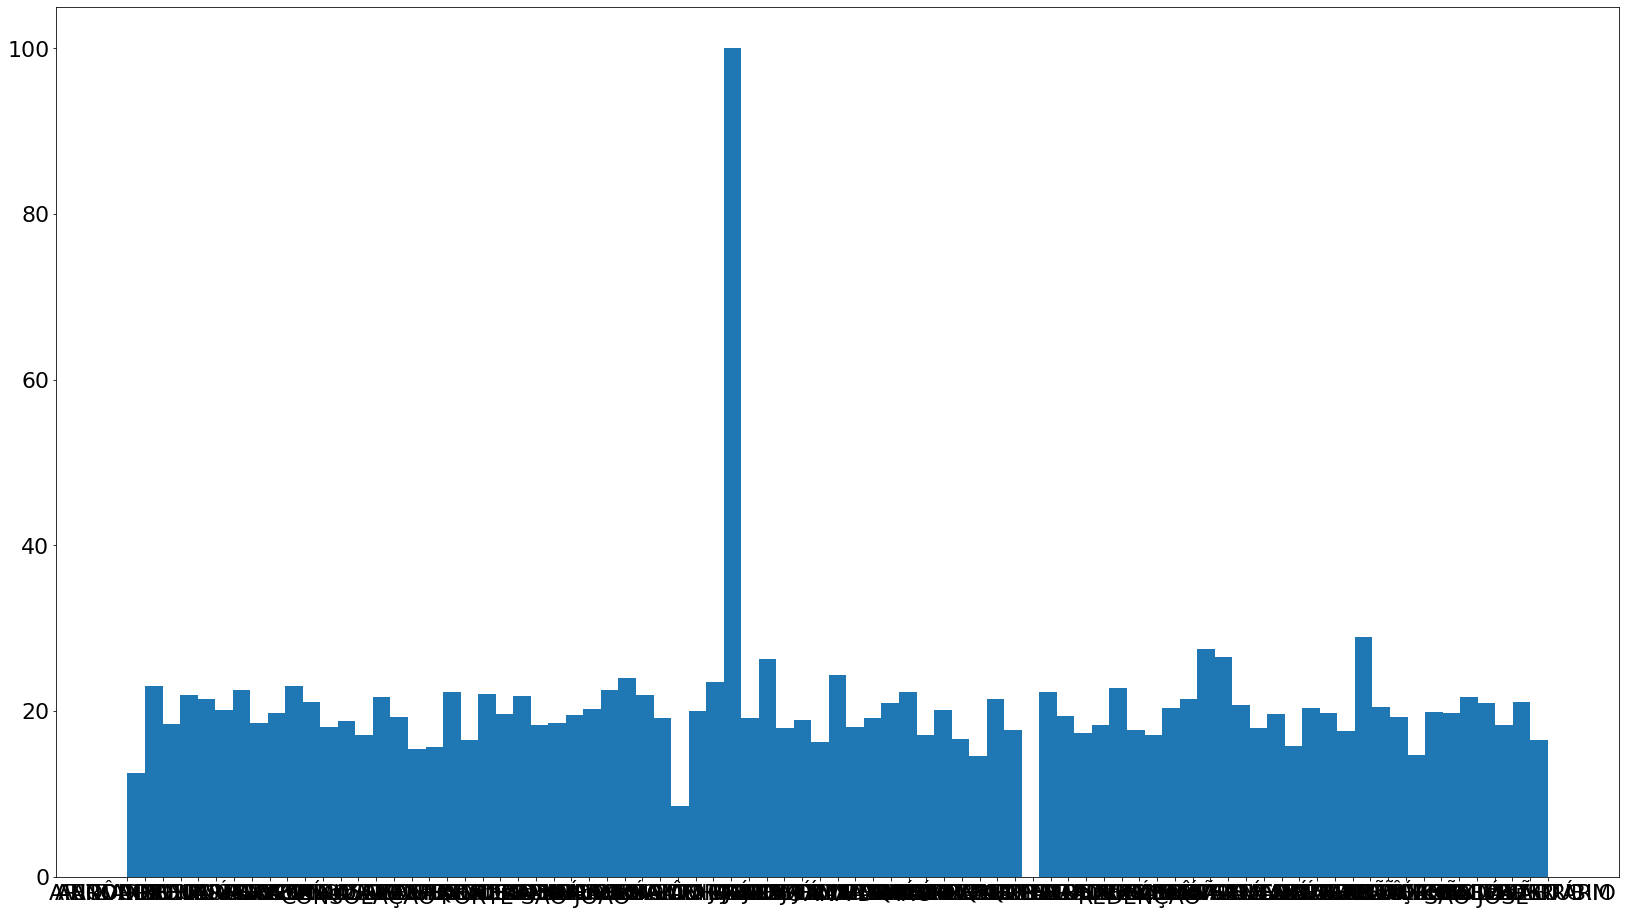

In [28]:
# Setting the size of the plot
plt.figure(figsize=(28,16))

# Setting the font size of the plot
plt.rcParams.update({'font.size': 22})

# Plotting the percentage of not showing agaisnt each neighbourhood
# and adjusting the no. of bins to be eqaul no. of neighbourhoods
plt.hist(df_3.neighbourhood, weights=df_3.perecentage, bins = 81);

Although the neighbourhood names are not readable, the plot is really insightful. As with the exception of very few outliers it is clear that the plot is fluctuating with small deviation.

### Is having a scholarship or not relate to the probability of a patient not showing?

In [29]:
# Creating a new data frame with only scholarship and no_show columns
df_1 = df[['scholarship','no_show']].copy()

# Creating a new data frame representing the number of entries with and those without scholarship
df_2 = df_1.groupby(['scholarship'],as_index=False).count()

# Creating a new data frame representing the number of entries that didn't show in those with and without scholarship
df_3 = df_1.groupby(['scholarship'],as_index=False).sum()

#Calculating the percentage of no show in those with and without scholarship
# (no. of entries with/without scholarship that didn't show / total no. of entries with/without scholarship) * 100
df_3['perecentage'] = (df_3['no_show'] / df_2['no_show'])*100

# Dropping the no_show columns as we don't need it anymore
df_3.drop(['no_show'], axis = 1, inplace = True)

In the previous cell a new data frame is created containing the percengtage of not showing against having or not having a scholarship.

In [30]:
# Replacing the values in the scolarship column from 1/0 to Yes/No for the following plot to be easier to read
df_3.replace({'scholarship': {1: 'Yes', 0: 'No'}}, inplace = True)

No scholarship have values of Yes and No

In [31]:
# Getting the exact percentage of no show in those with/without scolarship
df_3.head()

,scholarship,perecentage
0,No,19.803331
1,Yes,23.736304


People with no scholarship didn't show up 19.8% of the times while those with scholarship missed 23.7% of the appointments.

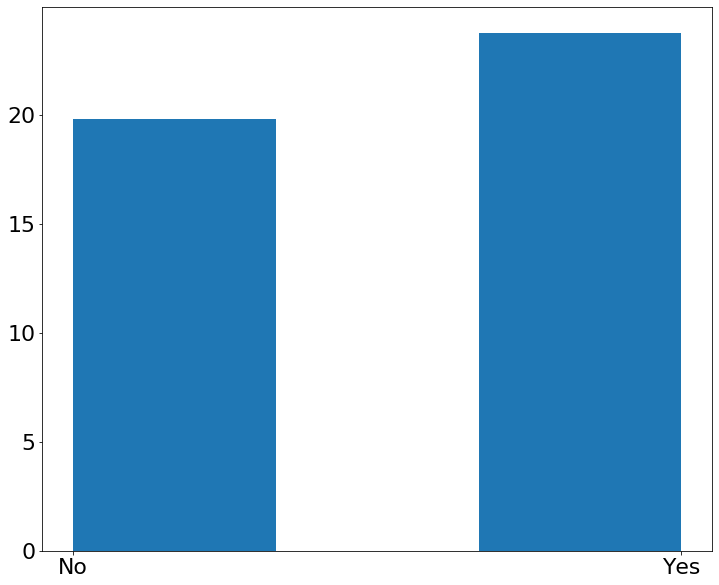

In [32]:
# Setting the size of the plot
plt.figure(figsize=(12,10))

# Plotting the percentages of no show in people with/without scolarship
plt.hist(df_3.scholarship, weights=df_3.perecentage, bins = 3);

The histograpm shows the difference of not showing percentages between this with and without scholarship. Those with scholarship have a slightly higher tendency of not showing for medical appointmens. Which is a surprising finding.

### Does a certain gender have a higher probability of missing appointments?

In [33]:
# Creating a new data frame with only gender and no_show columns
df_1 = df[['gender','no_show']].copy()

# Creating a new data frame representing the number of males/females
df_2 = df_1.groupby(['gender'],as_index=False).count()

# Creating a new data frame representing the number of males/females who didn't show
df_3 = df_1.groupby(['gender'],as_index=False).sum()

#Calculating the percentage of no show in males/females
# (no. of males/females that didn't show / total no. of males/females) * 100
df_3['perecentage'] = (df_3['no_show'] / df_2['no_show'])*100

# Dropping the no_show columns as we don't need it anymore
df_3.drop(['no_show'], axis = 1, inplace = True)

In the previous cell a new data frame is created containing the percengtage of not showing for both males and females.

In [34]:
# Getting the exact percentage of no show in males/females
df_3.head()

,gender,perecentage
0,F,20.311543
1,M,19.963810


Females miss 20.31% of appointmens, while males miss 19.96% of the appointmens.

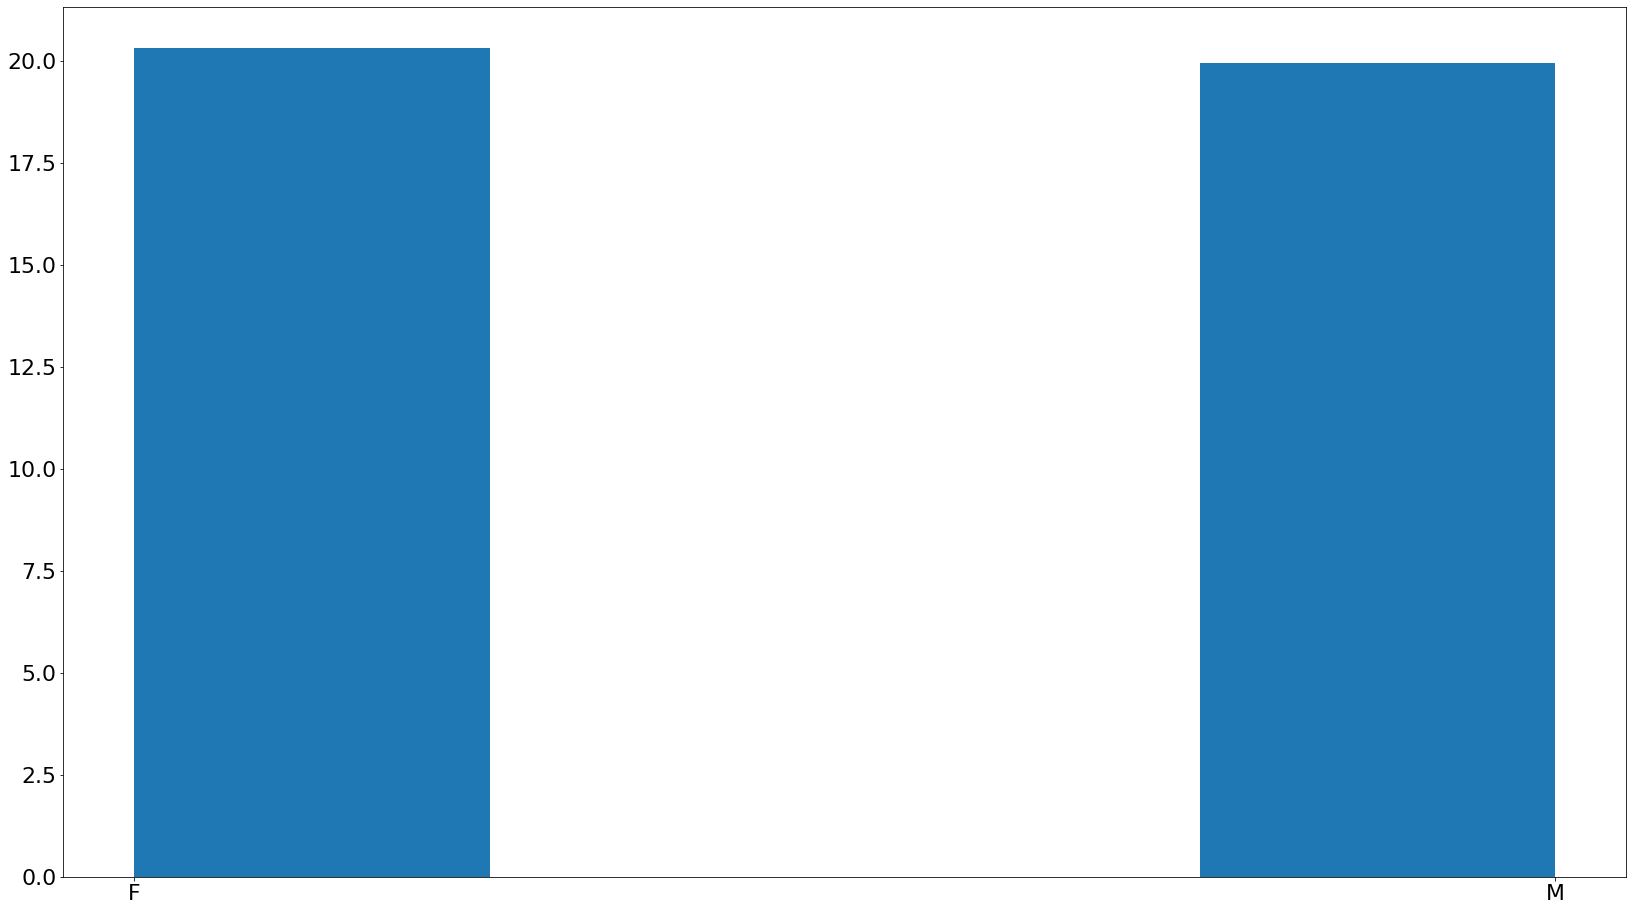

In [35]:
# Setting the size of the plot
plt.figure(figsize=(28,16))

# Setting the font size of the plot
plt.rcParams.update({'font.size': 22})

# Plotting the percentages of no show in males/females
plt.hist(df_3.gender, weights=df_3.perecentage, bins = 4);

The histogram shows the difference of not showing percenteges between males and females. The difference is negligble.

<a id='conclusions'></a>
## Conclusions


# Question 1: Is the time between scheduling the appointment and the appointment relate to the probability of the patient not showing?<br>
As the plot shows, between 0 and 80 days the probability of patient not showing increases with increasing time between scheduling the appointment and the appointment.

# Question 2: Does the neighbourhoood relate to the probability of the patient not showing?<br>
As the plot shows, some neighbourhooods have higher rates of not showing but the deviation is not large.

# Question 3: Is having a scholarship or not relate to the probability of a patient not showing?<br>
As the plot shows, those with scholarship don't show slightly more than those without.

# Question 4: Does a certain gender have a higher probability of missing appointments?<br>
As the plot shows, the gender does not play a factor in determining if the patient witll show or not.